In [1]:
!pip install langchain unstructured[all-docs] pydantic lxml openai tiktoken opencv-python

  Obtaining dependency information for langchain from https://files.pythonhosted.org/packages/cb/cc/684ac2410ad06957c17ffda787b7ff6c1595721c36c3b443c021e95cf998/langchain-0.1.11-py3-none-any.whl.metadata
  Obtaining dependency information for unstructured[all-docs] from https://files.pythonhosted.org/packages/c8/3a/e74f3a33685d8421840311766cb11ccbafa06368c1c8222543accb86ee9c/unstructured-0.12.5-py3-none-any.whl.metadata
  Using cached unstructured-0.12.5-py3-none-any.whl.metadata (26 kB)
  Obtaining dependency information for pydantic from https://files.pythonhosted.org/packages/ac/86/c98520827f58c8753783be4bf2286b4f73a18ac71c93ab597ae1aeb26fc8/pydantic-2.6.3-py3-none-any.whl.metadata
  Using cached pydantic-2.6.3-py3-none-any.whl.metadata (84 kB)
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/5b/d6/e794d996dec76b773691af78390fe2f419ab7cb5b78a4df982e21ae655b7/lxml-5.1.0-cp311-cp311-win_amd64.whl.metadata
  Using cached lxml-5.1.0-cp311-cp311-wi


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Using cached frozenlist-1.4.1-cp311-cp311-win_amd64.whl (50 kB)
Using cached google_auth-2.28.1-py2.py3-none-any.whl (186 kB)
Using cached googleapis_common_protos-1.62.0-py2.py3-none-any.whl (228 kB)
Using cached greenlet-3.0.3-cp311-cp311-win_amd64.whl (292 kB)
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
Using cached httptools-0.6.1-cp311-cp311-win_amd64.whl (55 kB)
   ---------------------------------------- 0.0/346.4 kB ? eta -:--:--
   --------------------------------------  337.9/346.4 kB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 346.4/346.4 kB 4.3 MB/s eta 0:00:00
Using cached idna-3.6-py3-none-any.whl (61 kB)
Using cached importlib_metadata-6.11.0-py3-none-any.whl (23 kB)
Using cached jsonpath_python-1.0.6-py3-none-any.whl (7.6 kB)
Using cached jsonpointer-2.4-py2.py3-none-any.whl (7.8 kB)
   ---------------------------------------- 0.0/49.4 kB ? eta -:--:--
   ---------------------------------------- 49.4/49.4 kB 2.6 MB/s eta 0:00:00
Using cached 

In [1]:
import os
import uuid
from IPython import display
from unstructured.partition.pdf import partition_pdf
from langchain.chat_models import ChatOpenAI
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.schema.document import Document
from langchain.vectorstores import FAISS

### PDF Document Analysis with Text, Table & Image Extraction: 

In [2]:
# For storing extracted images
output_path = "./images"

In [3]:
# Get elements
raw_pdf_elements = partition_pdf(
    filename="D:\Study\Projects\Test\Common Eye Diseases.pdf",
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    extract_image_block_output_dir=output_path,
)

This function will be deprecated in a future release and `unstructured` will simply use the DEFAULT_MODEL from `unstructured_inference.model.base` to set default model name
Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSe

In [4]:
raw_pdf_elements

In [16]:
print(raw_pdf_elements[4].text)

External Eye and Lids

The eyelids should be inspected to make sure that the lid margins and puncta are correctly

HYPERMETROPE

MYOPE

Figure 3.6. Optical defects of the eye.

Examination of the Eye

aligned against the globe and that there are no ingrowing lashes. Early basal cell carcinomas (also known as rodent ulcers) on eyelid skin can easily be missed, especially if obscured by cos- metics. The presence of ptosis should be noted and the ocular movements assessed by asking the patient to follow a ﬁnger upwards, down- wards and to each side. Palpation of the skin around the eyes can reveal an orbital tumour or swollen lacrimal sac. Palpation with the end of a glass rod is sometimes useful to ﬁnd points of tenderness when the lid is diffusely swollen. Such tenderness can indicate a primary infec- tion of a lash root or the lacrimal sac. Both sur- faces of the eyelids should be examined. The inside of the lower lid can easily be inspected by pulling down the skin of the lid with the

In [6]:
import os
import openai
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [7]:
from langchain_openai import ChatOpenAI

In [10]:
summary_prompt = """
Summarize the following {element_type}:
{element}
"""
summary_chain = LLMChain(
    llm=ChatOpenAI(model="gpt-3.5-turbo", max_tokens=1024),
    prompt=PromptTemplate.from_template(summary_prompt)
)

summary = summary_chain.invoke({'element_type': 'text', 'element': raw_pdf_elements[4]})

In [11]:
summary

{'element_type': 'text',
 'element': <unstructured.documents.elements.CompositeElement at 0x226850f31d0>,
 'text': 'The text discusses the importance of examining the external eye and lids for various conditions such as ingrown lashes, basal cell carcinomas, ptosis, and orbital tumors. It emphasizes the need to inspect both surfaces of the eyelids and how to properly examine them, including eversion of the upper lid to check for foreign bodies. Symptoms such as grittiness and tear overflow should also be noted during the examination.'}

In [ ]:
# Get text summaries and table summaries
text_elements = []
table_elements = []

text_summaries = []
table_summaries = []

summary_prompt = """
Summarize the following {element_type}:
{element}
"""
summary_chain = LLMChain(
    llm=ChatOpenAI(model="gpt-3.5-turbo", max_tokens=1024),
    prompt=PromptTemplate.from_template(summary_prompt)
)

for e in raw_pdf_elements:
    if 'CompositeElement' in repr(e):
        text_elements.append(e.text)
        summary = summary_chain.invoke({'element_type': 'text', 'element': e})
        text_summaries.append(summary)

    elif 'Table' in repr(e):
        table_elements.append(e.text)
        summary = summary_chain.invoke({'element_type': 'table', 'element': e})
        table_summaries.append(summary)

In [23]:
table_elements

['Age Ophthalmic: Subnormal vision Disturbances of vision Pain/discomfort Discharge Change in lacrimation Diplopia General medical: Drugs Duration. Difference between eyes Distortion, haloes, floaters, flashing lights, momentary losses of vision – field defects Increase/decrease Change in appearance – discolouration Swelling/mass Displacement Diabetes/ hypertension/ COAD/dysthyroid/ connective tissue disease FH social/ occupational']

### Image Analysis and Feature Extraction

In [25]:
!pip install google-generativeai

  Obtaining dependency information for google-generativeai from https://files.pythonhosted.org/packages/ae/24/c282649e1b07cc2b8db6ce5d3293b526487fa011d7ed09fd4cac3a3f29af/google_generativeai-0.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-ai-generativelanguage==0.4.0 from https://files.pythonhosted.org/packages/40/c2/d28988d3cba74e712f47a498e2b3e3b58ac215106019bf5d8c20f8ab9822/google_ai_generativelanguage-0.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-api-core from https://files.pythonhosted.org/packages/0f/87/373ab788a4682adc1a6900e54d54c750b7bd4be456d75b8bf64eccc23ef9/google_api_core-2.17.1-py3-none-any.whl.metadata
  Obtaining dependency information for proto-plus<2.0.0dev,>=1.22.3 from https://files.pythonhosted.org/packages/ad/41/7361075f3a31dcd05a6a38cfd807a6eecbfb6dbfe420d922cd400fc03ac1/proto_plus-1.23.0-py3-none-any.whl.metadata
  Obtaining dependency information for grpcio-status<2.0.dev0,>=1.33.2 from https://files


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import google.generativeai as genai
from PIL import Image

os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

In [44]:
# Get image summaries
image_elements = []
image_summaries = []

def summarize_image(image):
    response = get_gemini_response("Analyze this image",image)
    return response

for i in os.listdir(output_path):
    if i.endswith(('.png', '.jpg', '.jpeg')):
        print(i)
        image_path = os.path.join(output_path, i)
        image = Image.open(image_path)
        image_elements.append(image_path)
        summary = summarize_image(image)
        image_summaries.append(summary)
    

figure-1-1.jpg
figure-1-2.jpg
figure-10-20.jpg
figure-10-22.jpg
figure-10-23.jpg
figure-11-24.jpg
figure-11-25.jpg
figure-12-26.jpg
figure-13-27.jpg
figure-13-28.jpg
figure-13-29.jpg
figure-14-30.jpg
figure-16-31.jpg
figure-16-32.jpg
figure-18-33.jpg
figure-18-34.jpg
figure-18-36.jpg
figure-19-37.jpg
figure-2-3.jpg
figure-2-4.jpg
figure-20-38.jpg
figure-3-5.jpg
figure-3-6.jpg
figure-4-7.jpg
figure-4-8.jpg
figure-5-10.jpg
figure-5-9.jpg
figure-6-11.jpg
figure-7-12.jpg
figure-7-13.jpg
figure-7-14.jpg
figure-7-15.jpg
figure-8-16.jpg
figure-8-17.jpg
figure-8-18.jpg
figure-9-19.jpg


In [45]:
image_summaries

[' The image shows an eye chart, which is used to measure visual acuity. The chart consists of a series of letters, numbers, and symbols that decrease in size as they go down the chart. The person being tested is asked to read the letters and symbols aloud, starting at the top of the chart and working their way down. The smallest line that the person can read correctly is recorded as their visual acuity.\n\nVisual acuity is measured in units called Snellen fractions. The Snellen fraction is a ratio of the distance at which the person is standing to the distance at which a person with normal vision can read the same line. For example, if a person can read the 20/20 line at 20 feet, their visual acuity is 20/20. If they can only read the 20/40 line at 20 feet, their visual acuity is 20/40.\n\nVisual acuity is an important measure of eye health. It can be used to diagnose and monitor a variety of eye conditions, such as nearsightedness, farsightedness, astigmatism, and macular degeneratio

### Vectordb for storing documents Embeddings

In [46]:
!pip install faiss-cpu

  Obtaining dependency information for faiss-cpu from https://files.pythonhosted.org/packages/d3/ad/63eb31be05c38445781caecbc6d3b9dec151012194b00573ba34f29d5cf5/faiss_cpu-1.8.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/14.5 MB 1.1 MB/s eta 0:00:14
    --------------------------------------- 0.4/14.5 MB 3.7 MB/s eta 0:00:04
   - -------------------------------------- 0.7/14.5 MB 4.9 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/14.5 MB 5.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.4/14.5 MB 6.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/14.5 MB 6.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.8/14.5 MB 6.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/14.5 MB 5.1 MB/s eta 0:00:03
   ----- -----------------------


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
table_summaries

[{'element_type': 'table',
  'element': <unstructured.documents.elements.Table at 0x22b07dd4c90>,
  'text': 'The table includes information about various symptoms and medical conditions related to ophthalmic and general medical issues. It covers symptoms such as subnormal vision, disturbances of vision, pain/discomfort, discharge, diplopia, and changes in lacrimation. It also includes general medical conditions like diabetes, hypertension, chronic obstructive airway disease (COAD), dysthyroidism, and connective tissue disease. Additionally, it mentions factors such as drug use, duration of symptoms, differences between eyes, visual disturbances like distortion, haloes, floaters, and flashing lights, changes in appearance, swelling/masses, and family/social history.'}]

### Embeddings of Image, Text & Tables

In [61]:
# Create Documents and Vectorstore
documents = []
retrieve_contents = []

for e, s in zip(text_elements, text_summaries):
    i = str(uuid.uuid4())
    doc = Document(
        page_content = s['text'],
        metadata = {
            'id': i,
            'type': 'text',
            'original_content': e
        }
    )
    retrieve_contents.append((i, e))
    documents.append(doc)

for e, s in zip(table_elements, table_summaries):
    doc = Document(
        page_content = s['text'],
        metadata = {
            'id': i,
            'type': 'table',
            'original_content': e
        }
    )
    retrieve_contents.append((i, e))
    documents.append(doc)

for e, s in zip(image_elements, image_summaries):
    doc = Document(
        page_content = s,
        metadata = {
            'id': i,
            'type': 'image',
            'original_content': e
        }
    )
    retrieve_contents.append((i, s))
    documents.append(doc)


In [62]:
vectorstore = FAISS.from_documents(documents=documents, embedding=OpenAIEmbeddings())

d:\Study\Projects\Test\.test\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [63]:
#Saving the Index

vectorstore.save_local("faiss_index")

## Integrating with LLM for concise output

In [11]:
prompt_template = """
You are an expert Ophthalmologist who treat eye diseases and their management.
Answer the question based only on the following context, which can include text, images and tables:
{context}
Question: {question}
Don't answer if you are not sure and decline to answer and say "Sorry, I don't have much information about it."
Just return the helpful answer in as much as detailed possible.
Answer:
"""

In [12]:
from langchain_openai import ChatOpenAI
qa_chain = LLMChain(llm=ChatOpenAI(model="gpt-3.5-turbo", max_tokens=1024),
                        prompt=PromptTemplate.from_template(prompt_template))

In [13]:
qa_chain

LLMChain(prompt=PromptTemplate(input_variables=['context', 'question'], template='\nYou are an expert Ophthalmologist who treat eye diseases and their management.\nAnswer the question based only on the following context, which can include text, images and tables:\n{context}\nQuestion: {question}\nDon\'t answer if you are not sure and decline to answer and say "Sorry, I don\'t have much information about it."\nJust return the helpful answer in as much as detailed possible.\nAnswer:\n'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x000002585906F850>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x00000258590874D0>, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024))

In [17]:
def answer(question):
    relevant_docs = vectorstore.similarity_search(question)
    context = ""
    relevant_images = []
    for d in relevant_docs:
        if d.metadata['type'] == 'text':
            context += '[text]' + d.metadata['original_content']
        elif d.metadata['type'] == 'table':
            context += '[table]' + d.metadata['original_content']
        elif d.metadata['type'] == 'image':
            context += '[image]' + d.page_content
            relevant_images.append(d.metadata['original_content'])
    result = qa_chain.run({'context': context, 'question': question})
    return result, relevant_images

In [7]:
from langchain_openai import OpenAIEmbeddings
vectorstore= FAISS.load_local("faiss_index", embeddings=OpenAIEmbeddings())

In [18]:
# Display result
result, relevant_images = answer("What causes lid injuries?")
print(result)

d:\Study\Projects\Test\.test\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


Lid injuries can be caused by foreign bodies, cuts from sharp objects, chemical burns, flash burns, or exposure to ultraviolet light. Foreign bodies, such as grit, can become lodged near the lower margin of the eyelid, leading to injury. Cuts on the eyelids can be caused by broken glass or sharp objects, and if not properly treated, can leave the patient with a permanently watering eye. Chemical burns or flash burns can also result in lid injuries. Exposure to ultraviolet light, such as from a welder's arc or snow blindness, can cause edema and erythema of the eyelids.


In [19]:
relevant_images

[]

In [26]:
result_1, relevant_images_1 = answer("What is Goldmann tonometer")
print(result_1)

The Goldmann tonometer is a device used to measure intraocular pressure (IOP) in the eye. It is considered the "gold standard" method for measuring IOP. The Goldmann tonometer works based on the principle of applanation, which involves flattening a small known area of the cornea with a variable force. The amount of force required to flatten this specific area is proportional to the intraocular pressure reading, which is then read from a dial on the device. The readings provided by the Goldmann tonometer are highly reproducible and are given in millimeters of mercury (mmHg).


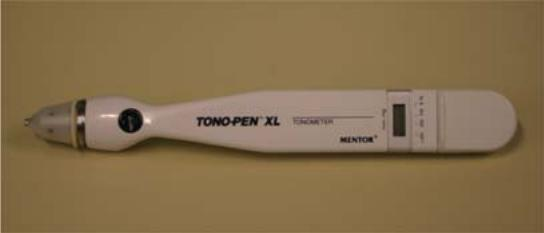

In [30]:
Image.open(relevant_images_1[0])

## Test if Retriever works fine for Textual Query

In [8]:
query = "What causes lid injuries?"
docs = vectorstore.similarity_search(query)

In [25]:
for i in docs:
    print(i.metadata['type'])

text
text
text
text


In [10]:
print(docs[0].page_content)

The text discusses common lid injuries, including foreign bodies under the eyelid and cuts on the eyelids. Lid eversion is a simple technique used to remove foreign bodies, while cuts on the lid margin may require suturing to prevent a permanently watering eye. Injuries can also be caused by chemical burns or exposure to ultraviolet light.


## Eavaluation of RAG & LLM

In [1]:
!pip install ragas

  Obtaining dependency information for ragas from https://files.pythonhosted.org/packages/67/28/a2da02431573472eeced1e837609a7f09d71e116dc1a13221585decda1ca/ragas-0.1.3-py3-none-any.whl.metadata
  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/95/fc/661a7f06e8b7d48fcbd3f55423b7ff1ac3ce59526f146fda87a1e1788ee4/datasets-2.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for pysbd>=0.3.4 from https://files.pythonhosted.org/packages/48/0a/c99fb7d7e176f8b176ef19704a32e6a9c6aafdf19ef75a187f701fc15801/pysbd-0.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for appdirs from https://files.pythonhosted.org/packages/3b/00/2344469e2084fb287c2e0b57b72910309874c3245463acd6cf5e3db69324/appdirs-1.4.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyarrow-hotfix from https://files.pythonhosted.org/packages/e4/f4/9ec2222f5f5f8ea04f66f184caafd991a39c8782e31f5b0266f101cb68ca/pyarrow_hotfix-0.6-py3-none-any.


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from datasets import Dataset 
from ragas import evaluate

d:\Study\Projects\Test\.test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision,
)
from ragas.metrics.critique import harmfulness

In [46]:
def evaluate_precision(question):
    relevant_docs = vectorstore.similarity_search(question)
    context = []

    for d in relevant_docs:
        if d.metadata['type'] == 'text':
            context.append([d.metadata['original_content']]) 
        elif d.metadata['type'] == 'table':
            context.append([d.metadata['original_content']]) 
        elif d.metadata['type'] == 'image':
            context.append([d.page_content])
    
    flat_list = [item for sublist in context for item in sublist]

    answer = qa_chain.run({'context': context, 'question': question})
    return question,answer, flat_list

In [48]:
query = "Who introduced ophthalmoscope?"
question, answer, context = evaluate_precision(query)

In [49]:
ground_truth = 'In 1851,Hermann von Helmholtz introduced ophthalmoscope'

In [50]:
data_samples = {
    'question': [question],
    'answer': [answer],
    'contexts' : [context],
    'ground_truth': [ground_truth]}
dataset = Dataset.from_dict(data_samples)

In [51]:
score = evaluate(dataset,
                 metrics=[context_precision,
                faithfulness,
                answer_relevancy,
                context_recall,
                harmfulness,])
score.to_pandas()

Evaluating: 100%|██████████| 5/5 [02:10<00:00, 26.15s/it]


,question,answer,contexts,ground_truth,context_precision,faithfulness,answer_relevancy,context_recall,harmfulness
0,Who introduced ophthalmoscope?,Hermann von Helmholtz introduced the ophthalmo...,[How to Use the Ophthalmoscope\n\nBefore the m...,"In 1851,Hermann von Helmholtz introduced ophth...",1.0,1.0,0.972562,1.0,0


# Thank you